# **MSiA422 Homework1 Xiaoyun Gong**

# **Exercise 1–Procedural vs Functional**

1. Create a function the will randomly generate a list of N numbers and words. Numbers and words count are random and the order is random too.

In [ ]:
import random
import string 

def generator(N):
  l = []
  for i in range(N):
    ## use a random integer to determine if 'i' is a number or text
    istext = random.randint(0,1)
    if istext == 0:
      l.append(random.randint(-1000,1000))
    else:
      ## first we need to randomly determine how many words are there. I denoted it as 'n'.
      n = random.randint(1,4)
      ## create a list 'ls' to store the 'n' words that will be generated.
      ls = []
      for i in range(n):
        ## first put the 'n' words into 'ls'
        ls.append(''.join(random.sample(string.ascii_lowercase,random.randint(1,20))))
      ## then make the 'n' words one string
      l.append(' '.join(ls))
  return l;

In [ ]:
test_case = generator(10)

2. Create two functions to calculate the desired output as follows: 

    a. Procedural code by using loops

    b. Functional code by using list comprehension.

In [ ]:
### part a

def count_type_loop(a):
  text = 0
  num = 0
  for i in a:
    if type(i) == str:
      text += len(i.split())
    elif type(i) == int:
      num += 1
    else:
      print(i, 'is not a number or text.')
  return [text, num]

In [ ]:
result = count_type_loop(test_case)
print("Count of Numbers:", result[1])
print("Count of text:", result[0])

Count of Numbers: 4
Count of text: 17


In [ ]:
### part b
def count_type_lc(a):
  text = sum([len(x.split()) if type(x) == str else 0 for x in a])
  num = sum([type(x) == int for x in a])
  return [text, num]

In [ ]:
result = count_type_lc(test_case)
print("Count of Numbers:", result[1])
print("Count of text:", result[0])

Count of Numbers: 4
Count of text: 17


3. Use TimeIt standard library and matplotlib to present the performance difference among the 2 solutionsfor different list sizes(N=100, 1000, 10000, 100000).

In [ ]:
import timeit
import math
N = [100, 1000, 10000, 100000]

### create two separate lists to save count_type_loop and save count_type_lc run time.
loop = []
lc = []
for n in N:
  l = generator(n)
  loop.append(timeit.timeit(lambda: count_type_loop(l), number = 100))
  lc.append(timeit.timeit(lambda: count_type_lc(l), number = 100))

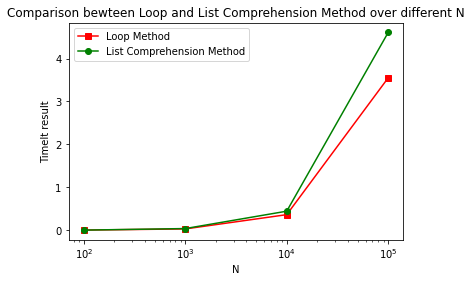

In [ ]:
import matplotlib.pyplot as plt

x = N
k1 = loop
k2 = lc
plt.plot(x, k1, 's-', color = 'r', label = "Loop Method")
plt.plot(x, k2, 'o-', color = 'g', label = "List Comprehension Method")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("TimeIt result")
plt.legend(loc = "best")
plt.title("Comparison bewteen Loop and List Comprehension Method over different N")
plt.show()

# **Exercise 2–Simple Student Grading System-memory based**

In [ ]:
### First, import all the packages that are needed. 
import pandas as pd
from google.colab import files
import io
import numpy as np 
from operator import itemgetter
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
### Upload the file. 
### This trunk is used to test over the provided exams.csv data set. 
uploaded = files.upload()
exams_df = pd.read_csv(io.BytesIO(uploaded['exams.csv']))

Saving exams.csv to exams.csv


In [ ]:
print(exams_df)

       id       Name  Quizzes  Projects  Exams
0     ID1      James       43        51     55
1     ID2  Josephine       76        84     87
2     ID3        Art       89        94     92
3     ID4      Lenna       70        67     64
4     ID5    Donette       63        59     58
..    ...        ...      ...       ...    ...
95   ID96      Carma       64        59     62
96   ID97    Malinda       66        62     55
97   ID98    Natalie       95        85     91
98   ID99      Lisha       69        67     55
99  ID100     Arlene       58        71     68

[100 rows x 5 columns]


In [ ]:
def get_finalscore(exams_df):
  '''
    This function calcultaes the finalscore for each student based on quizzes, projects, and exams score. 
    I round it to the nearest integer because otherwise it will cause significant problem when calculating the mode later. 
  '''
  exams_df['Finalscore'] = round(0.3 * exams_df.Quizzes + 0.3 * exams_df.Projects + 0.4 * exams_df.Exams, 0).astype(int)
  return exams_df

In [ ]:
get_finalscore(exams_df)
exams_df

,id,Name,Quizzes,Projects,Exams,Finalscore
0,ID1,James,43,51,55,50
1,ID2,Josephine,76,84,87,83
2,ID3,Art,89,94,92,92
3,ID4,Lenna,70,67,64,67
4,ID5,Donette,63,59,58,60
...,...,...,...,...,...,...
95,ID96,Carma,64,59,62,62
96,ID97,Malinda,66,62,55,60
97,ID98,Natalie,95,85,91,90
98,ID99,Lisha,69,67,55,63


In [ ]:
def get_finalgrade(exams_df):
  '''
  Get final grade based the the grading criteria provided. 
  '''
  conditions = [
    (exams_df['Finalscore'] < 10),
    (exams_df['Finalscore'] >= 10) & (exams_df['Finalscore'] < 20),
    (exams_df['Finalscore'] >= 20) & (exams_df['Finalscore'] < 80),
    (exams_df['Finalscore'] >= 80) & (exams_df['Finalscore'] < 90),
    (exams_df['Finalscore'] >= 90) & (exams_df['Finalscore'] <= 100)
    ]

  values = ['F', 'D', 'C', 'B', 'A']
  exams_df['Finalgrade'] = np.select(conditions, values)

In [ ]:
get_finalgrade(exams_df)
exams_df

,id,Name,Quizzes,Projects,Exams,Finalscore,Finalgrade
0,ID1,James,43,51,55,50,C
1,ID2,Josephine,76,84,87,83,B
2,ID3,Art,89,94,92,92,A
3,ID4,Lenna,70,67,64,67,C
4,ID5,Donette,63,59,58,60,C
...,...,...,...,...,...,...,...
95,ID96,Carma,64,59,62,62,C
96,ID97,Malinda,66,62,55,60,C
97,ID98,Natalie,95,85,91,90,A
98,ID99,Lisha,69,67,55,63,C


In [ ]:
def cast_to_dict(exams_df):
  '''
  Cast the dataframe to a dictionary as required. The dictionary will be used in a later function get_info(exams_dict)
  '''

  exams_dict = exams_df.set_index('id').T.to_dict('list')
  return exams_dict

In [ ]:
exams_dict = cast_to_dict(exams_df)
exams_dict

{'ID1': ['James', 43, 51, 55, 50, 'C'],
 'ID10': ['Kris', 60, 66, 65, 64, 'C'],
 'ID100': ['Arlene', 58, 71, 68, 66, 'C'],
 'ID11': ['Minna', 41, 49, 43, 44, 'C'],
 'ID12': ['Abel', 53, 54, 50, 52, 'C'],
 'ID13': ['Kiley', 58, 52, 57, 56, 'C'],
 'ID14': ['Graciela', 69, 79, 74, 74, 'C'],
 'ID15': ['Cammy', 55, 67, 58, 60, 'C'],
 'ID16': ['Mattie', 73, 69, 72, 71, 'C'],
 'ID17': ['Meaghan', 69, 81, 76, 75, 'C'],
 'ID18': ['Gladys', 69, 70, 73, 71, 'C'],
 'ID19': ['Yuki', 82, 81, 79, 80, 'B'],
 'ID2': ['Josephine', 76, 84, 87, 83, 'B'],
 'ID20': ['Fletcher', 66, 79, 76, 74, 'C'],
 'ID21': ['Bette', 58, 62, 63, 61, 'C'],
 'ID22': ['Veronika', 90, 83, 77, 83, 'B'],
 'ID23': ['Willard', 75, 67, 65, 69, 'C'],
 'ID24': ['Maryann', 66, 52, 57, 58, 'C'],
 'ID25': ['Alisha', 74, 69, 64, 68, 'C'],
 'ID26': ['Allene', 78, 84, 81, 81, 'B'],
 'ID27': ['Chanel', 45, 53, 49, 49, 'C'],
 'ID28': ['Ezekiel', 53, 69, 62, 61, 'C'],
 'ID29': ['Willow', 91, 94, 93, 93, 'A'],
 'ID3': ['Art', 89, 94, 92, 92, '

In [ ]:
def get_info(exams_dict):
  '''
  This function returns the name, final score, and final grade of each student in a list. 
  '''
  ls = []
  for key in exams_dict:
    l = [exams_dict[key][0], exams_dict[key][4], exams_dict[key][5]]
    ls.append(l)
  ls = sorted(ls, key = itemgetter(0))
  return ls  

In [ ]:
get_info(exams_dict)

[['Abel', 52, 'C'],
 ['Albina', 32, 'C'],
 ['Alisha', 68, 'C'],
 ['Alishia', 66, 'C'],
 ['Allene', 81, 'B'],
 ['Amber', 79, 'C'],
 ['Ammie', 66, 'C'],
 ['Arlene', 66, 'C'],
 ['Arlette', 68, 'C'],
 ['Art', 92, 'A'],
 ['Bernardo', 45, 'C'],
 ['Bette', 61, 'C'],
 ['Blair', 91, 'A'],
 ['Blondell', 32, 'C'],
 ['Bobbye', 58, 'C'],
 ['Brock', 75, 'C'],
 ['Cammy', 60, 'C'],
 ['Carma', 62, 'C'],
 ['Carmelina', 59, 'C'],
 ['Cecily', 48, 'C'],
 ['Chanel', 49, 'C'],
 ['Cory', 84, 'B'],
 ['Danica', 56, 'C'],
 ['Deeanna', 82, 'B'],
 ['Delisa', 77, 'C'],
 ['Delmy', 85, 'B'],
 ['Devorah', 83, 'B'],
 ['Dominque', 54, 'C'],
 ['Donette', 60, 'C'],
 ['Dyan', 100, 'A'],
 ['Elly', 52, 'C'],
 ['Elvera', 84, 'B'],
 ['Elza', 71, 'C'],
 ['Emerson', 64, 'C'],
 ['Erick', 59, 'C'],
 ['Ernie', 69, 'C'],
 ['Ezekiel', 61, 'C'],
 ['Fatima', 98, 'A'],
 ['Fletcher', 74, 'C'],
 ['Francine', 86, 'B'],
 ['Gladys', 71, 'C'],
 ['Graciela', 74, 'C'],
 ['Ilene', 65, 'C'],
 ['Jamal', 73, 'C'],
 ['James', 50, 'C'],
 ['Jina', 86,

In [ ]:
def score_summary(exams_df):
  '''
  This function provides the #of students, min, max, mean, mode, and standard diviation in a list.
  '''
  student_count = len(exams_df)
  mini = min(exams_df.Finalscore)
  maxi = max(exams_df.Finalscore)
  avg = np.mean(exams_df.Finalscore)
  mode = stats.mode(exams_df.Finalscore)
  sd = statistics.stdev(exams_df.Finalscore)
  ls = [student_count, mini, maxi, avg, mode[0][0], sd]
  return ls

In [ ]:
score_summary(exams_df)

[100, 32, 100, 69.08, 66, 14.240133922874957]

In [ ]:
def outlier(exams_df):
  '''
  This function 
  '''
  avg = np.mean(exams_df.Finalscore)
  sd = statistics.stdev(exams_df.Finalscore)
  bound = avg + 2 * sd
  return exams_df.Finalscore[exams_df["Finalscore"] > bound].tolist()
  

In [ ]:
outlier(exams_df)

[100, 98]

In [ ]:
def pie(exams_df):
  # exams_df.Finalgrade.value_counts().plot(kind='pie', figsize=(15,10), autopct='%1.1f%%')
  result = exams_df["Finalgrade"].value_counts()
  y = np.array([])
  for i in range(result.count()):
    y = np.append(y, result.values[i])
  mylabels = exams_df["Finalgrade"].value_counts().index.to_list()
  plt.pie(y, labels = mylabels)
  plt.legend()
  plt.title("Final Grade Distribution Pie Chart")
  plt.show() 

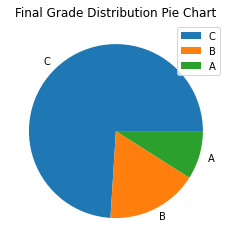

In [ ]:
pie(exams_df)

In [ ]:
def percent_info(exams_df):
  mini = min(exams_df.Finalscore)
  maxi = max(exams_df.Finalscore)
  median = np.percentile(exams_df.Finalscore, 50).astype(int)
  q1 = np.percentile(exams_df.Finalscore, 25).astype(int)
  q3 = np.percentile(exams_df.Finalscore, 75).astype(int)
  ls = (mini, maxi, median, q1, q3)
  return ls

In [ ]:
percent_info(exams_df)

(32, 100, 69, 60, 80)

Please upload the comma delimited file, exams.csv


Saving exams.csv to exams (1).csv
Please select operations: 
 1. Final score and grade for each student. 
 2. Score summary. 
 3. Outstanding scores. 
 4. Grade distribution pie chart. 
 5. Percentile info. 
 6. Exit.
Please enter the number in front of your intented operation.
2
There are 100 students in this class.
The lowest final score is 32, and the highest final score is 100.
The average final score is 69.08, and the mode of final score is 66.
The standard deviation of final score is 14
Please enter the number in front of your intented operation.
1
[['Abel', 52, 'C'], ['Albina', 32, 'C'], ['Alisha', 68, 'C'], ['Alishia', 66, 'C'], ['Allene', 81, 'B'], ['Amber', 79, 'C'], ['Ammie', 66, 'C'], ['Arlene', 66, 'C'], ['Arlette', 68, 'C'], ['Art', 92, 'A'], ['Bernardo', 45, 'C'], ['Bette', 61, 'C'], ['Blair', 91, 'A'], ['Blondell', 32, 'C'], ['Bobbye', 58, 'C'], ['Brock', 75, 'C'], ['Cammy', 60, 'C'], ['Carma', 62, 'C'], ['Carmelina', 59, 'C'], ['Cecily', 48, 'C'], ['Chanel', 49, 'C'], 

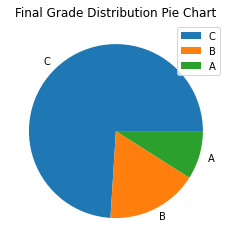

In [ ]:
### Interface
print("Please upload the comma delimited file, exams.csv")
uploaded = files.upload()
exams_df = pd.read_csv(io.BytesIO(uploaded['exams.csv']))
get_finalscore(exams_df)
get_finalgrade(exams_df)
exams_dict = cast_to_dict(exams_df)
print("Please select operations: \n 1. Final score and grade for each student. \n 2. Score summary. \n 3. Outstanding scores. \n 4. Grade distribution pie chart. \n 5. Percentile info. \n 6. Exit.")
while True: 
  x = input("Please enter the number in front of your intented operation.\n")

  if (x == '1'):
    ls = get_info(exams_dict)
    print(ls)
  elif (x == '2'):
    ls = score_summary(exams_df)
    print("There are {} students in this class.".format(ls[0]))
    print("The lowest final score is {}, and the highest final score is {}.".format(ls[1], ls[2]))
    print("The average final score is {}, and the mode of final score is {}.".format(ls[3], ls[4]))
    print("The standard deviation of final score is {}".format(round(ls[5])))
  elif (x == '3'):
    ls = outlier(exams_df)
    print("There are {} outstanding scores. These scores are {}.".format(len(ls), ls))
  elif (x == '4'):
    pie(exams_df)
  elif (x == '5'):
    ls = percent_info(exams_df)
    print("The lowest final score is {}".format(ls[0]))
    print("The highest final score is {}.".format(ls[1]))
    print("The median of final score is {}.".format(ls[2]))
    print("The 25 percentile of final score is {}.".format(ls[3]))
    print("The 75 percentile of final score is {}.".format(ls[4]))
  elif (x == '6'):
    break
  else:
    print("The number you enter must be in 1-6.")

**Exercise 3** 
-Pick an extensionlibrary from PyPIor other sources(something of interest to you). Summarizethe functionality provided by the library(one paragraph)and show a usage example.

For this question, I chose the visualization package "seaborn".

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. Some very useful functions that Seaborn can do include using categorical variables to show observations or aggregate statistics and providing high-level abstractions for structuring multi-plot grids. 

Here is an example using seaborn: 
In this example, I used the .scatterplot function to make a scatterplot on the exams dataframe. This plot might be meaningless though. 

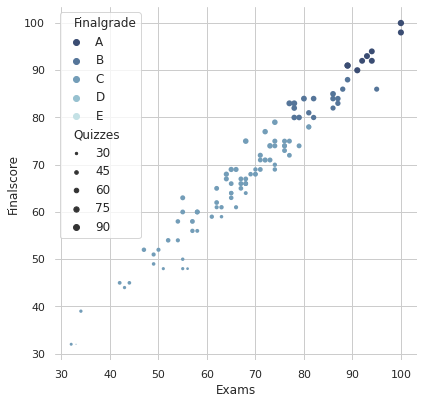

In [ ]:
import seaborn as sns

sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
grade = ["A", "B", "C", "D", "E"]
sns.scatterplot(x="Exams", y="Finalscore",
                hue="Finalgrade", size="Quizzes",
                palette="ch:r=-.2,d=.3_r",
                hue_order = grade,
                sizes=(1, 40), linewidth=0,
                data=exams_df, ax=ax)

Reference: 
https://pypi.org/project/seaborn/
https://seaborn.pydata.org/generated/seaborn.scatterplot.html